In [1]:
# Install required packages (if not already installed)
!pip install nltk
!pip install wordcloud
!pip install xgboost

# Download NLTK stopwords
import nltk
nltk.download('stopwords')
# Import NLTK modules
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

STOPWORDS = set(stopwords.words('english'))

# Other imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, precision_score, recall_score, f1_score)
from sklearn.preprocessing import MinMaxScaler
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import pickle
import re
import string

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BHAVANA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\BHAVANA\Downloads\Mobile Dataset.csv")

In [4]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,These guys are the best! I had a little situat...,2.0


In [5]:
df.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
30522,Apple iPhone 6 Unlocked GSM Cell Phone - Silver,Apple,399.99,1,Phone was not unlocked. I was not able to use ...,NaN
30523,Apple iPhone 6 Unlocked GSM Cell Phone - Silver,Apple,399.99,5,Was a little nervous about ordering this but i...,NaN
30524,Apple iPhone 6 Unlocked GSM Cell Phone - Silver,Apple,399.99,5,Great Product and very fast shipment.,NaN
30525,Apple iPhone 6 Unlocked GSM Cell Phone - Silver,Apple,399.99,5,Auesome phone and service through the vendor,0.0
30526,Apple iPhone 6 Unlocked GSM Cell Phone - Silver,Apple,399.99,1,i received improperly IPhone. I had to arrange...,3.0


In [6]:
print(df.columns)

Index(['Product Name', 'Brand Name', 'Price', 'Rating', 'Reviews',
       'Review Votes'],
      dtype='object')


In [7]:
df.shape

(30527, 6)

In [8]:
df.duplicated().sum()

4226

In [9]:
df.isnull().sum()

Product Name       0
Brand Name      6287
Price            701
Rating             0
Reviews            9
Review Votes     904
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df=df.iloc[:50000]

In [12]:
from bs4 import BeautifulSoup
import re

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove special characters and extra whitespace
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Example usage:
df['Reviews'] = df['Reviews'].apply(clean_text)

In [13]:
import nltk

# Download all required NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')  # This is the specific resource that's missing
nltk.download('stopwords')  # Often needed for text processing
nltk.download('wordnet')    # Useful for lemmatization

# Now your tokenization should work
from nltk.tokenize import word_tokenize

def tokenize_text(text):
    return word_tokenize(text)

# Apply to your DataFrame
df['Reviews_Tokens'] = df['Reviews'].apply(tokenize_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BHAVANA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\BHAVANA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BHAVANA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BHAVANA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def normalize_text(tokens):
    # Convert to lowercase
    tokens = [token.lower() for token in tokens]
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Apply stemming
    tokens = [stemmer.stem(token) for token in tokens]
    # Apply lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Example usage:
df['Reviews_Normalized'] = df['Reviews_Tokens'].apply(normalize_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BHAVANA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BHAVANA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Reviews_Tokens,Reviews_Normalized
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,"[Very, pleased]",[plea]
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,"[It, works, good, but, it, goes, slow, sometim...","[work, good, goe, slow, sometim, good, phone, ..."
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose I got that soldere...,0.0,"[The, charging, port, was, loose, I, got, that...","[charg, port, loo, got, solder, need, new, bat..."
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,Its battery life is great Its very responsive ...,0.0,"[Its, battery, life, is, great, Its, very, res...","[batteri, life, great, respons, touch, issu, s..."
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,These guys are the best I had a little situati...,2.0,"[These, guys, are, the, best, I, had, a, littl...","[guy, best, littl, situat, item, quickli, fix,..."
...,...,...,...,...,...,...,...,...
30519,Apple iPhone 6 Unlocked GSM Cell Phone - Silver,Apple,399.99,5,Great Product and very fast shipment,1.0,"[Great, Product, and, very, fast, shipment]","[great, product, fast, shipment]"
30520,Apple iPhone 6 Unlocked GSM Cell Phone - Silver,Apple,399.99,5,Auesome phone and service through the vendor,0.0,"[Auesome, phone, and, service, through, the, v...","[auesom, phone, servic, vendor]"
30521,Apple iPhone 6 Unlocked GSM Cell Phone - Silver,Apple,399.99,1,i received improperly IPhone I had to arrange ...,3.0,"[i, received, improperly, IPhone, I, had, to, ...","[receiv, improperli, iphon, arrang, money, buy]"
30525,Apple iPhone 6 Unlocked GSM Cell Phone - Silver,Apple,399.99,5,Auesome phone and service through the vendor,0.0,"[Auesome, phone, and, service, through, the, v...","[auesom, phone, servic, vendor]"


In [17]:
import nltk
nltk.download('vader_lexicon') 
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Assuming 'data' is your DataFrame
df['Reviews'] = df['Reviews'].astype(str)  # Convert 'Reviews' column to string type

# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Review Length
df['Review_Length'] = df['Reviews'].apply(lambda x: len(x.split()))

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['Reviews'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# Price vs. Rating
df['Price_Rating_Ratio'] = df['Price'] / df['Rating']

# Suspicious Review Votes
threshold_votes = 50 # You can adjust this threshold as needed
df['Suspicious_Votes'] = df['Review Votes'] > threshold_votes

# Print or analyze the dataframe to see the results
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BHAVANA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  \
0       5                                       Very pleased           0.0   
1       4  It works good but it goes slow sometimes but i...           0.0   
2       2  The charging port was loose I got that soldere...           0.0   
3       3  Its battery life is great Its very responsive ...           0.0   
4       5  These guys are the best I had a little situati...           2.0   

                                      Reviews_Tokens  \
0                       

In [18]:
# Define thresholds for each attribute
SENTIMENT_THRESHOLD = 0.1  # Positive sentiment threshold
REVIEW_LENGTH_THRESHOLD = 10  # Minimum review length
PRICE_RATING_RATIO_THRESHOLD = 10  # Maximum allowed price/rating ratio
SUSPICIOUS_VOTES_THRESHOLD = 50  # Number of review votes to consider as suspicious

# Identify fake reviews based on thresholds
df['Fake_Review'] = (
    (df['Sentiment'] < SENTIMENT_THRESHOLD) |  # Low sentiment
    (df['Review_Length'] < REVIEW_LENGTH_THRESHOLD) |  # Short review
    (df['Price_Rating_Ratio'] > PRICE_RATING_RATIO_THRESHOLD) |  # High price/rating ratio
    (df['Suspicious_Votes'])  # Suspicious review votes
)

# Convert boolean values to 1 (True) and 0 (False)
df['Fake_Review'] = df['Fake_Review'].astype(int)

# Print or analyze the dataframe to see the results
print(df[['Reviews', 'Sentiment', 'Review_Length', 'Price_Rating_Ratio', 'Suspicious_Votes', 'Fake_Review']].head())


                                             Reviews  Sentiment  \
0                                       Very pleased     0.4927   
1  It works good but it goes slow sometimes but i...     0.9185   
2  The charging port was loose I got that soldere...    -0.0516   
3  Its battery life is great Its very responsive ...     0.8268   
4  These guys are the best I had a little situati...     0.8750   

   Review_Length  Price_Rating_Ratio  Suspicious_Votes  Fake_Review  
0              2           39.998000             False            1  
1             17           49.997500             False            1  
2             42           99.995000             False            1  
3             36           66.663333             False            1  
4             35           39.998000             False            1  


In [19]:
print(f"Rating value count: \n{df['Fake_Review'].value_counts()}")

Rating value count: 
Fake_Review
1    23015
0      513
Name: count, dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23528 entries, 0 to 30526
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product Name        23528 non-null  object 
 1   Brand Name          23528 non-null  object 
 2   Price               23528 non-null  float64
 3   Rating              23528 non-null  int64  
 4   Reviews             23528 non-null  object 
 5   Review Votes        23528 non-null  float64
 6   Reviews_Tokens      23528 non-null  object 
 7   Reviews_Normalized  23528 non-null  object 
 8   Sentiment           23528 non-null  float64
 9   Review_Length       23528 non-null  int64  
 10  Price_Rating_Ratio  23528 non-null  float64
 11  Suspicious_Votes    23528 non-null  bool   
 12  Fake_Review         23528 non-null  int32  
dtypes: bool(1), float64(4), int32(1), int64(2), object(5)
memory usage: 2.3+ MB


In [22]:
df.describe()

,Price,Rating,Review Votes,Sentiment,Review_Length,Price_Rating_Ratio,Fake_Review
count,23528.000000,23528.000000,23528.000000,23528.000000,23528.000000,23528.000000,23528.000000
mean,204.559668,3.936884,0.877125,0.337388,15.377678,73.608735,0.978196
std,150.836648,1.569019,4.585565,0.461363,19.466388,88.668688,0.146046
min,17.950000,1.000000,0.000000,-0.966500,0.000000,3.590000,0.000000
25%,115.000000,3.000000,0.000000,0.000000,3.000000,25.998000,1.000000
50%,179.990000,5.000000,0.000000,0.475400,9.000000,44.954000,1.000000
75%,235.160000,5.000000,0.000000,0.665200,21.000000,89.998000,1.000000
max,2000.000000,5.000000,127.000000,0.994300,481.000000,734.990000,1.000000


In [23]:
print(f"The brands available are: \n{df['Brand Name'].value_counts()}")

The brands available are: 
Brand Name
Apple                    23150
JUNING                      89
Ulefone                     56
Alcatel                     32
VKworld                     26
OtterBox                    21
Samsung                     20
Jiuhe                       19
HTM                         18
amar                        15
Acer                        12
Plum                        10
Certified Refurbished        7
Huawei                       7
Elephone                     6
Amazon                       6
Digital SNITCH               5
Yezz                         5
Lenovo                       4
Apple Computer               4
Phone Baby                   3
Indigi                       3
NOKIA                        2
TCL Mobile                   2
LG                           2
Odysseus                     1
Android                      1
Yezz Wireless Ltd.           1
inDigi                       1
Name: count, dtype: int64


In [24]:
print(f"The ratings are: \n{df['Rating'].value_counts()}")

The ratings are: 
Rating
5    14475
1     4275
4     2607
3     1207
2      964
Name: count, dtype: int64


In [25]:
corpus = []
for i in range(0, df.shape[0]):
    review = str(df.iloc[i]["Reviews"])  # Convert to string
    review = re.sub('[^a-zA-Z]', ' ', review)
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word.lower() not in STOPWORDS]  # Use word.lower() to match case
    review = ' '.join(review)
    corpus.append(review)

In [27]:
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = df['Fake_Review'].values

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the training and testing sets
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (16469, 2500)
y train: (16469,)
X test: (7059, 2500)
y test: (7059,)


In [29]:
print(f"X train max value:{X_train.max()}")
print(f"X test max value:{X_test.max()}")

X train max value:12
X test max value:9


In [30]:
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.fit_transform(X_test)

In [31]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
y_pred = model_xgb.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9773338999858336
Precision: 0.9785724421739748
Recall: 0.9986965966690804
F1-score: 0.9885321100917431

Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.02      0.04       154
           1       0.98      1.00      0.99      6905

    accuracy                           0.98      7059
   macro avg       0.61      0.51      0.51      7059
weighted avg       0.96      0.98      0.97      7059



In [33]:
cm = confusion_matrix(y_test, y_pred)

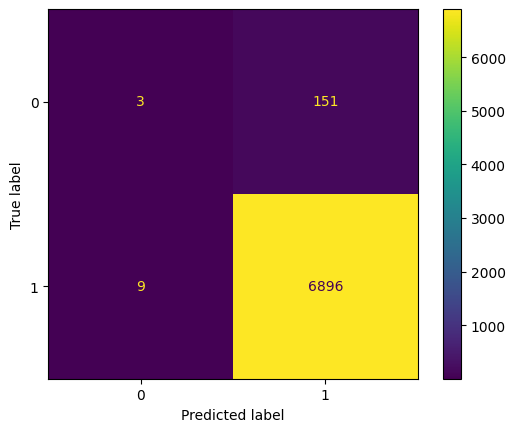

In [40]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_xgb.classes_)
cm_display.plot()
plt.show()

In [41]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [42]:
# Predict on the test set
y_pred = model_rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.975067289984417
Precision: 0.9808489352579677
Recall: 0.9939174511223751
F1-score: 0.9873399510861747

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.13      0.19       154
           1       0.98      0.99      0.99      6905

    accuracy                           0.98      7059
   macro avg       0.65      0.56      0.59      7059
weighted avg       0.97      0.98      0.97      7059



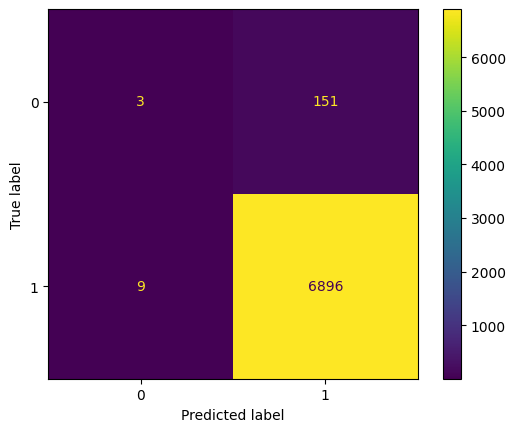

In [43]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model_rf.classes_)
cm_display.plot()
plt.show()

In [44]:
# Initialize SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [46]:
# Predict on the testing set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9739339849837088
Precision: 0.9795918367346939
Recall: 0.9940622737146995
F1-score: 0.9867740080506038

Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.07      0.11       154
           1       0.98      0.99      0.99      6905

    accuracy                           0.97      7059
   macro avg       0.60      0.53      0.55      7059
weighted avg       0.96      0.97      0.97      7059



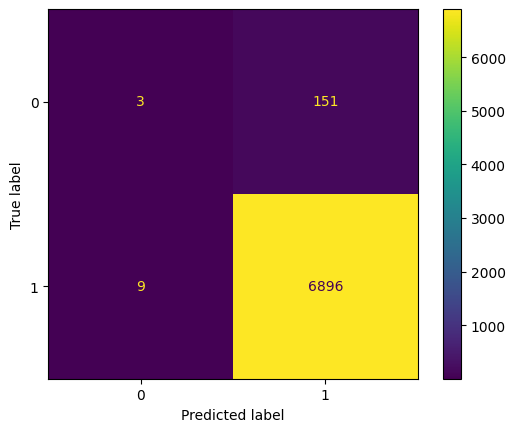

In [47]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = svm_model.classes_)
cm_display.plot()
plt.show()

In [48]:
# Combine 'Reviews' and 'Brand Name' columns for better feature representation
df['Combined_Text'] = df['Reviews'] + ' ' + df['Brand Name'].fillna('') 

# Split data into features (X) and target variable (y)
X = df['Combined_Text']
y = df['Fake_Review']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize CountVectorizer with n-gram range
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2))  # You can adjust the n-gram range as needed

# Transform text data into numerical features
X_train_transformed = ngram_vectorizer.fit_transform(X_train)
X_test_transformed = ngram_vectorizer.transform(X_test)

# Initialize Naive Bayes classifier
naive_bayes = MultinomialNB()

# Train the model
naive_bayes.fit(X_train_transformed, y_train)

# Predict on the testing set
y_pred = naive_bayes.predict(X_test_transformed)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9759172687349483
Precision: 0.9801796663339513
Recall: 0.9955104996379435
F1-score: 0.9877856013795085

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.10      0.15       154
           1       0.98      1.00      0.99      6905

    accuracy                           0.98      7059
   macro avg       0.65      0.55      0.57      7059
weighted avg       0.97      0.98      0.97      7059


Confusion Matrix:
[[  15  139]
 [  31 6874]]


In [49]:
# Define the thresholds for sentiment categories
thresholds = [-float('inf'), -0.5, 0.5, float('inf')]  # Adjust threshold values as needed
sentiment_labels = pd.cut(df['Sentiment'], bins=thresholds, labels=['negative', 'neutral', 'positive'])

# Update the 'sentiment' column with categorical labels
df['Sentiment'] = sentiment_labels

In [50]:
# Count the number of positive, negative, and neutral reviews
sentiment_counts = df['Sentiment'].value_counts()

# Print the counts
print("Number of positive reviews:", sentiment_counts['positive'])
print("Number of negative reviews:", sentiment_counts['negative'])
print("Number of neutral reviews:", sentiment_counts['neutral'])

Number of positive reviews: 11159
Number of negative reviews: 1567
Number of neutral reviews: 10802


In [51]:
# Separate fake and real reviews
fake_reviews = df[df['Fake_Review'] == False]
real_reviews = df[df['Fake_Review'] == True]

# Calculate sentiment counts for fake reviews
fake_sentiment_counts = fake_reviews['Sentiment'].value_counts()

# Calculate sentiment counts for real reviews
real_sentiment_counts = real_reviews['Sentiment'].value_counts()

# Print sentiment counts for fake reviews
print("Fake reviews:")
print("Number of positive reviews:", fake_sentiment_counts.get('positive', 0))
print("Number of negative reviews:", fake_sentiment_counts.get('negative', 0))
print("Number of neutral reviews:", fake_sentiment_counts.get('neutral', 0))

# Print sentiment counts for real reviews
print("\nReal reviews:")
print("Number of positive reviews:", real_sentiment_counts.get('positive', 0))
print("Number of negative reviews:", real_sentiment_counts.get('negative', 0))
print("Number of neutral reviews:", real_sentiment_counts.get('neutral', 0))


Fake reviews:
Number of positive reviews: 423
Number of negative reviews: 0
Number of neutral reviews: 90

Real reviews:
Number of positive reviews: 10736
Number of negative reviews: 1567
Number of neutral reviews: 10712


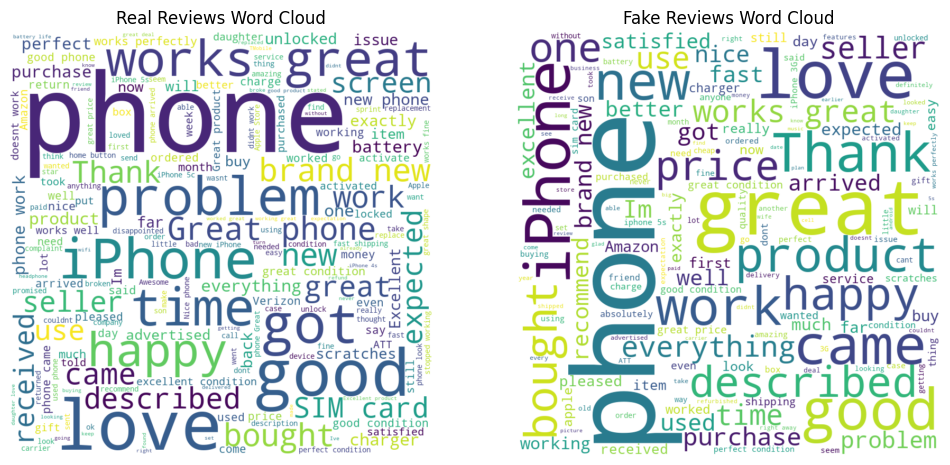

In [52]:
# Convert 'body' column to strings and replace NaNs with empty strings for real reviews
real_text = ' '.join(real_reviews['Reviews'].astype(str).fillna(''))

# Convert 'body' column to strings and replace NaNs with empty strings for fake reviews
fake_text = ' '.join(fake_reviews['Reviews'].astype(str).fillna(''))


# Generate word cloud for real reviews
real_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(real_text)

# Generate word cloud for fake reviews
fake_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(fake_text)

# Plot the word clouds
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Real Reviews Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Fake Reviews Word Cloud')
plt.axis('off')

plt.show()